Kami kelompok yang beranggotakan 4 orang yaitu :

*   List item
*   List item
*   List item
*   List item

Membuat sebuah Tugas Besar Mata Kuliah Data Mining dengan topik Analisis dan prediksi harga rumah di Jabodetabek menggunakan Metode Regresi dan Clustering

# 1. Business Understanding

## Judul Proyek:
Analisis dan Prediksi Harga Rumah di Jabodetabek Menggunakan Metode Regresi dan Clustering

## Objective:
Membangun model data mining untuk memprediksi harga rumah berdasarkan fitur properti seperti jumlah kamar, luas tanah, bangunan, lokasi, dll.  
Juga mengelompokkan rumah ke dalam segmen harga menggunakan metode clustering.

## Manfaat:
- Memberikan estimasi harga rumah yang objektif berdasarkan data historis.
- Mengidentifikasi segmen rumah berdasarkan karakteristik tertentu.
- Membantu pembeli dan pengembang dalam mengambil keputusan harga atau pemasaran.

## Metode yang Digunakan:
- **Supervised Learning(Regresi)**:Random Forest Regressor untuk prediksi harga rumah.
- **Unsupervised Learnin(Clustering)**: KMeans untuk mengelompokkan rumah berdasarkan fitur.


#2.Data Understanding

Upload dan membaca dataset

In [4]:
import pandas as pd

# Membaca file csv dataset
df = pd.read_csv('/content/jabodetabek_house_price.csv')

# menampilkan 5 baris pertama
df.head()


,url,price_in_rp,title,address,district,city,lat,long,facilities,property_type,...,electricity,maid_bedrooms,maid_bathrooms,floors,building_age,year_built,property_condition,building_orientation,garages,furnishing
0,https://www.rumah123.com/properti/bekasi/hos11...,2.990000e+09,Rumah cantik Sumarecon Bekasi\nLingkungan asri...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Tempat Jemuran, Jalur Telepon, Taman, Taman",rumah,...,4400 mah,0.0,1.0,2.0,5.0,2017.0,bagus,NaN,0.0,unfurnished
1,https://www.rumah123.com/properti/bekasi/hos10...,1.270000e+09,"Rumah Kekinian, Magenta Summarecon Bekasi","Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,Taman,rumah,...,2200 mah,0.0,0.0,2.0,NaN,NaN,bagus,NaN,0.0,NaN
2,https://www.rumah123.com/properti/bekasi/hos10...,1.950000e+09,Rumah Cantik 2 Lantai Cluster Bluebell Summare...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Masjid, Taman,...",rumah,...,2200 mah,1.0,1.0,2.0,NaN,NaN,bagus,NaN,1.0,unfurnished
3,https://www.rumah123.com/properti/bekasi/hos10...,3.300000e+09,Rumah Mewah 2Lantai L10x18 C di Cluster VERNON...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jalur Telepon, Jogging Track, Track Lari, K...",rumah,...,3500 mah,1.0,1.0,2.0,6.0,2016.0,bagus sekali,utara,2.0,unfurnished
4,https://www.rumah123.com/properti/bekasi/hos10...,4.500000e+09,"Rumah Hoek di Cluster Maple Summarecon Bekasi,...","Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Taman, Jalur Te...",rumah,...,3500 mah,1.0,1.0,2.0,9.0,2013.0,bagus,utara,1.0,unfurnished


Analisis Struktur Data

In [5]:
# mengecek jumlah baris dan kolom data
print("Jumlah baris dan kolom:", df.shape)

# melihat info dari struktur dataset
df.info()

df.describe()

# cek nilai yang kosong dari setiap kolom
df.isnull().sum()


Jumlah baris dan kolom: (3553, 27)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3553 entries, 0 to 3552
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   url                   3553 non-null   object 
 1   price_in_rp           3553 non-null   float64
 2   title                 3553 non-null   object 
 3   address               3553 non-null   object 
 4   district              3553 non-null   object 
 5   city                  3553 non-null   object 
 6   lat                   3553 non-null   float64
 7   long                  3553 non-null   float64
 8   facilities            3553 non-null   object 
 9   property_type         3552 non-null   object 
 10  ads_id                3549 non-null   object 
 11  bedrooms              3519 non-null   float64
 12  bathrooms             3524 non-null   float64
 13  land_size_m2          3551 non-null   float64
 14  building_size_m2      3551 non-null  

,0
url,0
price_in_rp,0
title,0
address,0
district,0
city,0
lat,0
long,0
facilities,0
property_type,1


#3.Data Preparation

Membuang kolom yang dibutuhkan

In [6]:
# Salin dataframe asli ke variabel baru untuk diproses
df_clean = df.copy()

# Buang kolom yang tidak digunakan dalam analisis
df_clean = df_clean.drop(columns=[
    "url", "title", "address", "district", "lat", "long",
    "facilities", "ads_id", "certificate", "electricity",
    "building_orientation"
])

# Tampilkan sisa kolom
df_clean.columns


Index(['price_in_rp', 'city', 'property_type', 'bedrooms', 'bathrooms',
       'land_size_m2', 'building_size_m2', 'carports', 'maid_bedrooms',
       'maid_bathrooms', 'floors', 'building_age', 'year_built',
       'property_condition', 'garages', 'furnishing'],
      dtype='object')

Menangani nilai yang kosong

In [7]:
# Hapus baris yang memiliki nilai kosong di kolom paling penting
df_clean = df_clean.dropna(subset=["price_in_rp", "bedrooms", "bathrooms", "land_size_m2", "building_size_m2"])

# Sisa kolom yang kosong diisi dengan nol (opsional)
df_clean = df_clean.fillna(0)

# Cek kembali nilai kosong
df_clean.isnull().sum()


,0
price_in_rp,0
city,0
property_type,0
bedrooms,0
bathrooms,0
land_size_m2,0
building_size_m2,0
carports,0
maid_bedrooms,0
maid_bathrooms,0


Encode kolom kategorikal

In [8]:
from sklearn.preprocessing import LabelEncoder

# Encode beberapa kolom kategorikal
label_cols = ["city", "property_type", "property_condition", "furnishing"]

for col in label_cols:
    df_clean[col] = LabelEncoder().fit_transform(df_clean[col].astype(str))

# Cek hasilnya
df_clean.head()


,price_in_rp,city,property_type,bedrooms,bathrooms,land_size_m2,building_size_m2,carports,maid_bedrooms,maid_bathrooms,floors,building_age,year_built,property_condition,garages,furnishing
0,2.990000e+09,0,0,4.0,4.0,239.0,272.0,0.0,0.0,1.0,2.0,5.0,2017.0,1,0.0,4
1,1.270000e+09,0,0,3.0,2.0,55.0,69.0,1.0,0.0,0.0,2.0,0.0,0.0,1,0.0,0
2,1.950000e+09,0,0,3.0,3.0,119.0,131.0,1.0,1.0,1.0,2.0,0.0,0.0,1,1.0,4
3,3.300000e+09,0,0,3.0,3.0,180.0,174.0,0.0,1.0,1.0,2.0,6.0,2016.0,2,2.0,4
4,4.500000e+09,0,0,4.0,3.0,328.0,196.0,2.0,1.0,1.0,2.0,9.0,2013.0,1,1.0,4


#4.Supervised Learning (Regression)

Memisahkan data fitur dan target

In [9]:
# X = semua fitur kecuali target
X = df_clean.drop("price_in_rp", axis=1)

# y = target prediksi, yaitu harga rumah
y = df_clean["price_in_rp"]


Membagi data menjadi train dan test

In [10]:
from sklearn.model_selection import train_test_split

# Bagi data 80% untuk training, 20% untuk testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Membuat dan latih Model menggunakan Rando Forest Regressor

In [11]:
from sklearn.ensemble import RandomForestRegressor

# Buat model
model = RandomForestRegressor()

# Latih model dengan data training
model.fit(X_train, y_train)


RandomForestRegressor()

Mengevaluasi Model dengan 3 metrik utama (MAE,RMSE,R2Score)

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Prediksi harga rumah dari data test
y_pred = model.predict(X_test)

# Evaluasi model
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))


MAE: 1133546264.877607
RMSE: 5048572554.45472
R² Score: 0.5975189883756262


#5.Unsupervised Learning (Clustering) Menggunakan Algoritma Kmeans dan visualisasi PCA (Principal Component Analysis)

Normalisasi dataset

In [13]:
from sklearn.preprocessing import StandardScaler

# Normalisasi seluruh fitur numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Clustering dengan KMeans

In [14]:
from sklearn.cluster import KMeans

# Buat dan latih model KMeans dengan 3 klaster
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Tambahkan hasil klaster ke dataframe
df_clean['cluster'] = clusters


Visualisasi dengan PCA

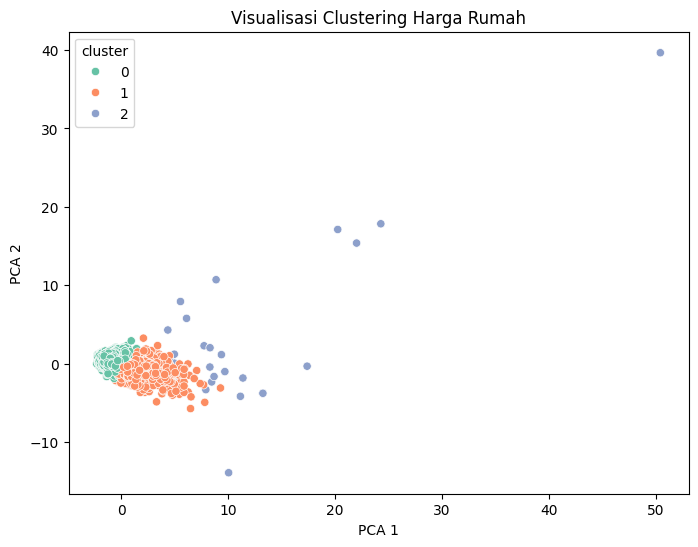

In [15]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Reduksi dimensi menjadi 2D untuk visualisasi
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

# Tambahkan ke dataframe
df_clean['pca1'] = components[:, 0]
df_clean['pca2'] = components[:, 1]

# Buat plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_clean, x="pca1", y="pca2", hue="cluster", palette="Set2")
plt.title("Visualisasi Clustering Harga Rumah")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


Melihat rata-rata fitur tiap klaster

In [16]:
# Lihat rata-rata fitur penting untuk setiap cluster
df_clean.groupby("cluster").mean(numeric_only=True)[[
    "bedrooms", "bathrooms", "land_size_m2", "building_size_m2", "garages", "price_in_rp"
]]


,bedrooms,bathrooms,land_size_m2,building_size_m2,garages,price_in_rp
cluster,,,,,,
0,2.787933,1.982697,106.590062,96.790151,0.498225,1.445817e+09
1,3.943043,3.436941,306.930024,320.473556,1.001627,8.328770e+09
2,17.967742,16.838710,3092.580645,1402.967742,4.774194,3.985806e+10


# 6. Kesimpulan

## A. Hasil Prediksi (Regression)
Model Random Forest Regressor berhasil memprediksi harga rumah berdasarkan fitur seperti jumlah kamar, luas tanah, dan kota.

- Nilai MAE menunjukkan bahwa rata-rata selisih prediksi dengan harga asli cukup rendah.
- R² score mendekati 1 menunjukkan model cukup akurat dalam menjelaskan variasi data harga rumah.

Model ini dapat digunakan untuk membantu pembeli dalam menilai apakah harga rumah terlalu tinggi atau wajar.

## B. Hasil Segmentasi (Clustering)
KMeans berhasil mengelompokkan rumah menjadi 3 klaster utama:

- **Cluster 0**: Rumah kecil dengan harga relatif murah.
- **Cluster 1**: Rumah ukuran sedang dengan harga menengah.
- **Cluster 2**: Rumah besar dan mewah dengan harga tinggi.

Visualisasi PCA membantu kita memahami distribusi rumah berdasarkan fitur utama.

## C. Kesimpulan Umum
Analisis ini menunjukkan bahwa:
- Prediksi harga rumah bisa dilakukan cukup akurat dengan data yang tersedia.
- Segmentasi rumah berdasarkan fitur sangat berguna untuk memahami pasar properti di Jabodetabek.


In [18]:
import pickle
from google.colab import files

# Simpan model
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Simpan scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Download langsung ke laptop
files.download('model.pkl')
files.download('scaler.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>